In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
tp.head(30)
tp.shape

(359388, 141)

In [6]:
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [7]:
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

In [8]:
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width', 'ideal_glass', 'fermentation',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume',
       'abv', 'units_per_sku','length', 'country_of_origin','height',
       'is_active','identification_number',
       'identification_number_unify', 'is_employee','last_name',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id', 'uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema'], axis = 1)

In [9]:
tpf1.isnull().sum()

country                            0
created_in                         0
creation_brand                     0
id                                 0
origin_score                       0
system                             0
table_origin                       0
td_id                              0
title                              0
time                               0
td_id.1                            0
customer_first_order_period        0
product_spk                        0
business_spk                       0
unit_discount_usd                  0
source_system                      0
business_name                      0
customer_first_order_date          0
unit_tax_usd                       0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
currency                           0
customer_first_order_year          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
c

In [10]:
tp_arg = tpf1.loc[tp['country'] == 'Argentina']

In [17]:
tp_f = tp_arg.dropna(1, how= 'all' )

In [18]:
tp_f.head(50)

,country,created_in,creation_brand,id,origin_score,system,table_origin,td_id,title,time,...,department,sku,brand,date_created,product_nk,name,category,subcategory,is_abi,time.1
17160,Argentina,"[""2018-01-12""]","[""ZX_ar_bevybar, 2018-01-12""]","[""ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952082,Mrs,1563236137,...,unknown,CRW-BP-14,Grupo Modelo,2016-04-18 10:42:34,6175972035,Pack Conservadora Corona,Mixed Pack,unknown,0,1563234029
17161,Argentina,"[""2016-05-16""]","[""ZX_ar_bevybar, 2016-05-16""]","[""ar_bevybar;f14a46180a983653d1e151da458045331...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952183,Mrs,1563236137,...,unknown,6109617020,Patagonia Brewing Co.,2016-05-10 14:23:04,6515438979,Pack Colección Patagonia XL,Mixed Pack,unknown,0,1563234029
17162,Argentina,"[""2017-09-20""]","[""ZX_ar_bevybar, 2017-09-20""]","[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952265,Mrs,1563236137,...,unknown,6105600014,Corona,2017-05-29 09:29:41,10458479491,Pack Corona Experience,Beer,Others,0,1563234029
17163,Argentina,"[""2018-04-18""]","[""ZX_ar_bevybar, 2018-04-18""]","[""ar_bevybar;9963d5cb526be2da8348e97b810925743...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952281,Mrs,1563236137,...,unknown,CRW-BP-14,Grupo Modelo,2016-04-18 10:42:34,6175972035,Pack Conservadora Corona,Mixed Pack,unknown,0,1563234029
17164,Argentina,"[""2016-12-12""]","[""ZX_ar_bevybar, 2016-12-12""]","[""ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb9...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952310,Mrs,1563236137,...,unknown,4003101006,Stella Artois,2016-02-24 19:07:55,5459218947,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,0,1563234029
17165,Argentina,"[""2017-06-13""]","[""ZX_ar_bevybar, 2017-06-13""]","[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952328,Mrs,1563236137,...,unknown,6109610010,Patagonia Brewing Co.,2017-01-04 11:47:02,9243936899,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,0,1563234029
17166,Argentina,"[""2018-01-26""]","[""ZX_ar_bevybar, 2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952394,Mrs,1563236137,...,unknown,1431404024,Flensburger Brauerei,2017-12-27 10:28:26,47861923843,Cerveza Flensburger Weizen,Beer,unknown,0,1563234029
17167,Argentina,"[""2018-01-26""]","[""ZX_ar_bevybar, 2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952394,Mrs,1563236137,...,unknown,1300612024,Patagonia Brewing Co.,2017-10-30 12:03:15,13818298371,Cerveza Patagonia 24.7 - Session IPA con Sauco...,Beer,unknown,0,1563234029
17168,Argentina,"[""2018-01-26""]","[""ZX_ar_bevybar, 2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952394,Mrs,1563236137,...,unknown,1300612024,Patagonia Brewing Co.,2017-10-30 12:03:15,13818298371,Cerveza Patagonia 24.7 - Session IPA con Sauco...,Beer,unknown,0,1563234029
17169,Argentina,"[""2018-05-19""]","[""ZX_ar_bevybar, 2018-05-19""]","[""ar_bevybar;9d3d65f4eccf1cd5d930f0dfb31ded597...","[""9""]","[""ar_bevybar""]","[""ZX_ar_bevybar""]",arg1952416,Mrs,1563236137,...,unknown,6106600013,Corona,2018-04-23 17:30:52,754738626659,Pack Conservadora Corona,Mixed Pack,unknown,0,1563234029


In [19]:
tp_f.shape

(133049, 52)

In [20]:
## Algunos comentarios: 
##   No hay info de 2019, termina en 18 Agosto 2018
##   id podriamos usarlo para saber cuanto gasta una persona en promedio en ecommerce, ver evolucion
##   Bevybar y Craft Society son cosas sin marca, habria que unirlas

cant_NaNf = tp_f.isnull().sum()
print(cant_NaNf,'\r\n')

country                            0
created_in                         0
creation_brand                     0
id                                 0
origin_score                       0
system                             0
table_origin                       0
td_id                              0
title                              0
time                               0
td_id.1                            0
customer_first_order_period        0
product_spk                        0
business_spk                       0
unit_discount_usd                  0
source_system                      0
business_name                      0
customer_first_order_date          0
unit_tax_usd                       0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
currency                           0
customer_first_order_year          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
c

In [27]:
##Tabla para ver cuantas veces compró cada usuario
aux = tp_f.groupby(['id'])['id'].count()
aux2 = aux.loc[aux < 10]
aux2.head(5)

id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;00010fe97133694cb929e412dba2d425dfa510e6193b75c2d314e32720c2abbf"]    4
["ar_bevybar;00036c6ab89d9a91e03876ca8dae2087fbd765a7a8abc9c57839248342cf56f0"]    1
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    2
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
Name: id, dtype: int64

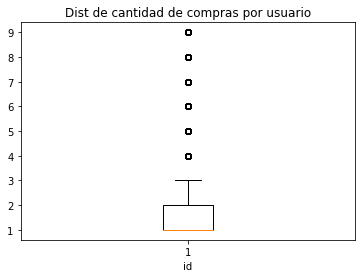

In [28]:
plt.boxplot(aux2)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()

In [29]:
tp_f['brand'].unique()

array(['Grupo Modelo', 'Patagonia Brewing Co.', 'Corona', 'Stella Artois',
       'Flensburger Brauerei', 'Peñón del Águila', 'BevyBar',
       'Multimarca', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Craft Society',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja',
       'Cervecería y Maltería Quilmes', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company', 'Fabricas Nacionales De Cerveza',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous', 'Cerveceria Arte

In [30]:
tp_f.brand.value_counts()

Stella Artois                                26870
Patagonia Brewing Co.                        19573
BevyBar                                      17801
Corona                                        9376
Grupo Modelo                                  8025
Leffe                                         7313
Spaten-Franziskaner-Bräu                      6707
Hoegaarden                                    2972
Brauerei Beck & Co                            2290
Cervecería y Maltería Quilmes                 1688
Multimarca                                    1687
Löwenbräu                                     1311
De La Vaca Tranquila Cervezas Artesanales     1276
Craft Society                                 1261
Brouwerij Van Steenberge                      1183
Bass Brewery                                  1118
Peñón del Águila                               975
Coopers Brewery                                916
Les Brasseurs de Gayant                        902
Paulaner Brauerei München      

In [31]:
tp_f.category.value_counts()

Mixed Pack      68524
Beer            44355
Merchandise     11067
unknown          3568
Wine             1237
Spirits           651
Home Brewing       47
Name: category, dtype: int64

In [61]:
##Voy a buscar dejar un dataset solo con las marcas de cerveza, y con las importadas agrupadas
aux1 = tp_f.loc[tp_f['category'].isin(['Mixed Pack', 'Beer', 'Merchandise'])]
aux1.shape

(123946, 52)

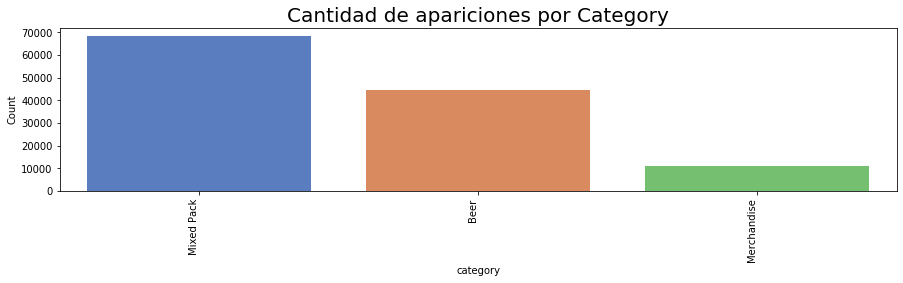

In [62]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= aux1, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

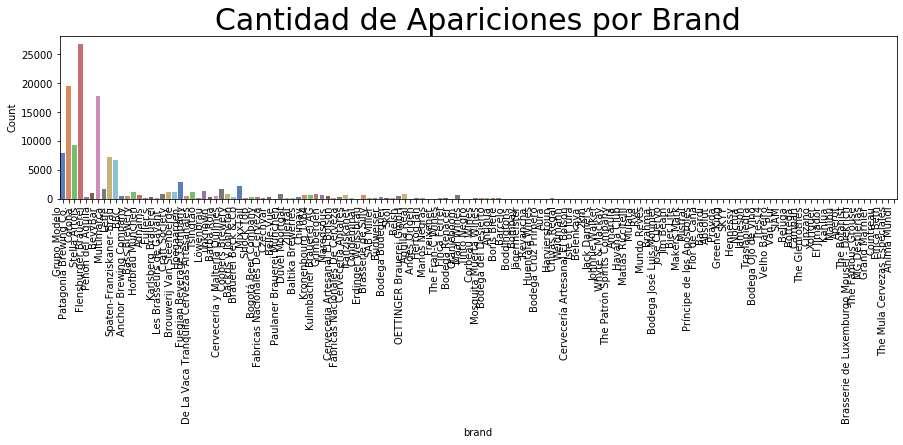

In [63]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_f, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [64]:
tp_f.created_in.value_counts()

["2016-07-21"]    5649
["2016-03-06"]    3214
["2016-05-16"]    2696
["2017-05-15"]    1701
["2016-05-17"]    1673
["2016-10-31"]    1558
["2017-05-17"]    1391
["2017-10-30"]    1233
["2017-10-31"]    1205
["2017-05-16"]    1191
["2017-11-01"]     998
["2016-11-01"]     983
["2017-12-06"]     815
["2018-05-16"]     766
["2017-12-19"]     686
["2018-05-15"]     686
["2018-01-08"]     632
["2017-02-13"]     522
["2016-04-01"]     506
["2017-02-09"]     477
["2017-03-22"]     476
["2016-09-21"]     467
["2017-10-05"]     458
["2016-11-16"]     435
["2018-05-14"]     434
["2017-05-10"]     417
["2017-02-10"]     404
["2016-04-20"]     400
["2017-03-29"]     390
["2017-11-06"]     389
                  ... 
["2018-01-01"]      15
["2016-05-07"]      15
["2016-03-30"]      15
["2016-04-15"]      14
["2016-02-08"]      14
["2016-09-03"]      14
["2016-03-03"]      14
["2018-01-13"]      13
["2017-01-22"]      13
["2016-12-31"]      12
["2016-05-15"]      12
["2016-10-23"]      12
["2016-05-1